In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import requests library
import requests

# Import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # if the city name is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

612

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+") + "&APPID=" + weather_api_key
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dickinson
Processing Record 2 of Set 1 | fort nelson
Processing Record 3 of Set 1 | aklavik
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | saint-leu
Processing Record 8 of Set 1 | san pedro
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | sorland
Processing Record 11 of Set 1 | bereda
Processing Record 12 of Set 1 | mazamari
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | pu

Processing Record 35 of Set 4 | shenjiamen
Processing Record 36 of Set 4 | muros
Processing Record 37 of Set 4 | galanta
Processing Record 38 of Set 4 | terrace bay
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | taunggyi
Processing Record 41 of Set 4 | aquiraz
Processing Record 42 of Set 4 | qaqortoq
Processing Record 43 of Set 4 | tshela
Processing Record 44 of Set 4 | dire
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | abu samrah
Processing Record 48 of Set 4 | nome
Processing Record 49 of Set 4 | masuguru
Processing Record 50 of Set 4 | kadom
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | champerico
Processing Record 3 of Set 5 | roquetas de mar
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | rocha
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | lasa
Processing Record 8 of Set 5 | tuatapere
Processing Record 9 

Processing Record 27 of Set 8 | kalmunai
Processing Record 28 of Set 8 | urumqi
Processing Record 29 of Set 8 | aasiaat
Processing Record 30 of Set 8 | sept-iles
Processing Record 31 of Set 8 | himora
City not found. Skipping...
Processing Record 32 of Set 8 | meyungs
City not found. Skipping...
Processing Record 33 of Set 8 | omboue
Processing Record 34 of Set 8 | jishu
Processing Record 35 of Set 8 | panalingaan
Processing Record 36 of Set 8 | povenets
Processing Record 37 of Set 8 | opuwo
Processing Record 38 of Set 8 | buala
Processing Record 39 of Set 8 | miles city
Processing Record 40 of Set 8 | geraldton
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | batagay-alyta
Processing Record 43 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | ajdabiya
Processing Record 46 of Set 8 | phan thiet
Processing Record 47 of Set 8 | khormuj
City not found. Skipping...
Processing Record 48 of Set 8 |

Processing Record 12 of Set 12 | le vauclin
Processing Record 13 of Set 12 | poum
Processing Record 14 of Set 12 | severo-yeniseyskiy
Processing Record 15 of Set 12 | resistencia
Processing Record 16 of Set 12 | coahuayana
Processing Record 17 of Set 12 | khorixas
Processing Record 18 of Set 12 | atar
Processing Record 19 of Set 12 | alto araguaia
Processing Record 20 of Set 12 | tripoli
Processing Record 21 of Set 12 | hay river
Processing Record 22 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 23 of Set 12 | marcona
City not found. Skipping...
Processing Record 24 of Set 12 | pasighat
Processing Record 25 of Set 12 | watertown
Processing Record 26 of Set 12 | kaele
Processing Record 27 of Set 12 | asfi
Processing Record 28 of Set 12 | carlsbad
Processing Record 29 of Set 12 | cranbourne
Processing Record 30 of Set 12 | eyrarbakki
Processing Record 31 of Set 12 | winona
Processing Record 32 of Set 12 | dharmadam
Processing Record 33 of Set 12 | tigil
Processing Rec

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dickinson,29.4608,-95.0513,297.66,85,0,1.54,US,2022-11-09 01:52:19
1,Fort Nelson,58.8053,-122.7002,255.34,100,40,1.54,CA,2022-11-09 01:52:19
2,Aklavik,68.2191,-135.0107,265.87,89,100,1.11,CA,2022-11-09 01:52:20
3,Ushuaia,-54.8000,-68.3000,281.96,53,75,1.54,AR,2022-11-09 01:48:19
4,Rikitea,-23.1203,-134.9692,297.47,87,100,6.06,PF,2022-11-09 01:52:20
5,Busselton,-33.6500,115.3333,293.18,55,21,4.00,AU,2022-11-09 01:52:21
6,Saint-Leu,-21.1500,55.2833,297.57,90,63,0.81,RE,2022-11-09 01:52:21
7,San Pedro,14.3500,121.0167,302.79,77,75,2.06,PH,2022-11-09 01:52:21
8,Cherskiy,68.7500,161.3000,251.99,98,98,1.93,RU,2022-11-09 01:52:22
9,Sorland,67.6670,12.6934,278.07,60,1,9.88,NO,2022-11-09 01:52:22


In [9]:
# Re-order the columns
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dickinson,US,2022-11-09 01:52:19,29.4608,-95.0513,297.66,85,0,1.54
1,Fort Nelson,CA,2022-11-09 01:52:19,58.8053,-122.7002,255.34,100,40,1.54
2,Aklavik,CA,2022-11-09 01:52:20,68.2191,-135.0107,265.87,89,100,1.11
3,Ushuaia,AR,2022-11-09 01:48:19,-54.8000,-68.3000,281.96,53,75,1.54
4,Rikitea,PF,2022-11-09 01:52:20,-23.1203,-134.9692,297.47,87,100,6.06
5,Busselton,AU,2022-11-09 01:52:21,-33.6500,115.3333,293.18,55,21,4.00
6,Saint-Leu,RE,2022-11-09 01:52:21,-21.1500,55.2833,297.57,90,63,0.81
7,San Pedro,PH,2022-11-09 01:52:21,14.3500,121.0167,302.79,77,75,2.06
8,Cherskiy,RU,2022-11-09 01:52:22,68.7500,161.3000,251.99,98,98,1.93
9,Sorland,NO,2022-11-09 01:52:22,67.6670,12.6934,278.07,60,1,9.88


In [14]:
# Create an output file to save the DataFrame in as a CSV in a new folder for that file

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

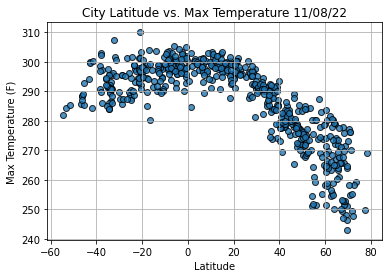

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

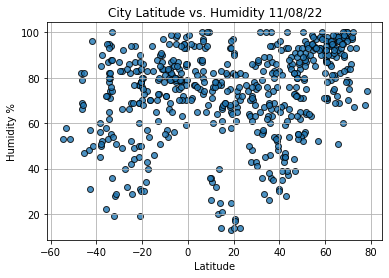

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

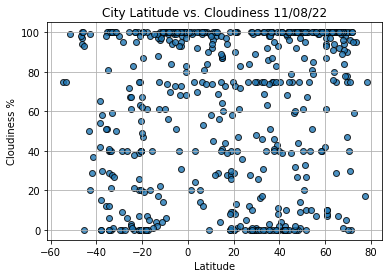

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

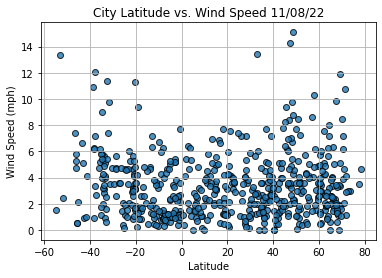

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()